<img src="https://th.bing.com/th/id/OIG2.sONQejaDIjDVlciFyay8?pid=ImgGn" style="width:100%">

<div style="font-family: Arial, sans-serif; padding: 20px; background-color: #F0FFFF; color: navy; border: 2px solid navy; border-radius: 10px; width: 100%;">
  <div style="text-align: center;">
    <h1 style="font-size: 28px;">📣 Basic Information</h1>
  </div>
  <div style="padding: 20px;">
    <div style="margin-bottom: 20px;">
      </p>
    </div>
    <div>
      <h2 style="font-size: 24px;">🔻 About Model</h2>
      <p style="font-size: 18px;">
        🌳 <b>RandomForestClassifier</b> <br>
        RandomForestClassifier is a supervised machine learning algorithm that is part of the ensemble learning method. It is used for classification problems.<br>
        Here's how the RandomForestClassifier works: <br><br>
        <b>Bagging</b>: 🎒 The algorithm starts by creating multiple decision tree models on random subsets of the training data using a technique called bagging (bootstrap aggregating). This creates a "forest" of decision trees. <br><br>
        <b>Random Feature Selection</b>: 🎲 When splitting a node during the construction of a tree, the algorithm selects a random subset of features to consider, rather than considering all features, as is done in a standard decision tree. This adds an additional layer of randomness to the model. <br><br>
        <b>Voting/Averaging</b>: 🗳️ Once the forest of decision trees is created, to classify a new data point, the algorithm will pass the data point through each of the decision trees in the forest. Each tree will provide a classification output. The final classification is determined by a majority vote (for classification problems) or an average (for regression problems) of all the individual tree predictions. <br><br>
        The key advantages of the RandomForestClassifier are: <br>
        <ul style="list-style-type: disc; margin-left: 20px;">
          <li>It can handle both classification and regression problems.</li>
          <li>It is robust to outliers and can handle missing values well.</li>
          <li>It has a high accuracy compared to a single decision tree.</li>
          <li>It can automatically handle feature importance, making it useful for feature selection.</li>
          <li>It is relatively simple to tune and interpret compared to other complex models like neural networks.</li>
        </ul>
      </p>
    </div>
    <div>
      <h2 style="font-size: 24px;">🔻 Table of Contents</h2>
      <ul style="list-style-type: none;">
        <li><a href="#1">Step 1 | Libraries</a>
          <ul style="list-style-type: none;">
            <li><a href="#1_1">Load Data</a></li>
            <li><a href="#1_2">Data Info</a></li>
            <li><a href="#1_3">Rename Columns</a></li>
            <li><a href="#1_4">Deal Missing Values</a></li>
            <li><a href="#1_5">Deal Duplicate Values</a></li>
          </ul>
        </li>
        <li><a href="#2">Step 2 | Visualization</a>
          <ul style="list-style-type: none;">
            <li><a href="#2_1">Pie & Bar</a></li>
            <li><a href="#2_2">Cross Table Plot</a></li>
            <li><a href="#2_3">Cloud Plot Of Branches</a></li>
            <li><a href="#2_4">Cloud Plot Of Tweets</a></li>
          </ul>
        </li>
        <li><a href="#3">Step 3 | Preprocessing</a>
          <ul style="list-style-type: none;">
            <li><a href="#3_1">Remove Non String</a></li>
            <li><a href="#3_2">Convert In LowerCase</a></li>
            <li><a href="#3_3">Remove Html Tags</a></li>
            <li><a href="#3_4">Remove URL</a></li>
            <li><a href="#3_5">Remove Numeric Digits</a></li>
            <li><a href="#3_6">Remove Punctuation</a></li>
            <li><a href="#3_7">Split Text In Token</a></li>
            <li><a href="#3_8">Eliminate Stop Words</a></li>
            <li><a href="#3_9">Remove Emoji</a></li>
            <li><a href="#3_10">Vectorized Data</a></li>
          </ul>
        </li>
        <li><a href="#4">Step 4 | Build Model</a>
          <ul style="list-style-type: none;">
            <li><a href="#4_1">Train Split Data</a></li>
            <li><a href="#4_2">RandomForestClassifier</a></li>
            <li><a href="#4_3">Confusion Matrix</a></li>
            <li><a href="#4_4">Actual VS Predicted</a></li>
            <li><a href="#4_5">Save Model</a></li>
            <li><a href="#4_6">Predict Random Tweet By Save Model</a></li>
          </ul>
        </li>
      </ul>
    </div>
  </div>
</div>


<a id="1"></a>
# <b> <span style='color:dimgray'>Step 1</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Libraries</span></b>


In [38]:
# import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string
import nltk
import joblib
# Download the WordNet resource
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package wordnet to C:\Users\B.Faruq
[nltk_data]     Hussain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\B.Faruq
[nltk_data]     Hussain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\B.Faruq
[nltk_data]     Hussain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\B.Faruq
[nltk_data]     Hussain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<a id="1_1"></a>
# <b> <span style='color:dimgray'>Step 1.1</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Load Data</span></b>


In [39]:
# read data
df_train = pd.read_csv(r'C:\Users\B.Faruq Hussain\Desktop\Python\twitter_training.csv')
df_val = pd.read_csv(r'C:\Users\B.Faruq Hussain\Desktop\Python\twitter_validation.csv')
# concatenate data
df = pd.concat([df_train, df_val], ignore_index=False)
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN


<a id="1_2"></a>
# <b> <span style='color:dimgray'>Step 1.2</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Data Info</span></b>

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                              --------------  -----  
 0   2401                                                                                                                                                                                                                                                74681 non-null  float64
 1   Borderlands                                                                

<a id="1_3"></a>
# <b> <span style='color:dimgray'>Step 1.3</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Rename Columns</span></b>


In [41]:
# Remove unnecessary columns
columns_to_drop = ['2401', '3364', 'Facebook', 'Irrelevant',
                   'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣']
df = df.drop(columns_to_drop, axis=1)

# Rename columns
df = df.rename(columns={'im getting on borderlands and i will murder you all ,': 'Tweet', 'Positive': 'Sentiment', 'Borderlands':"Branch"})
df.head()

,Branch,Sentiment,Tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


<a id="1_4"></a>
# <b> <span style='color:dimgray'>Step 1.4</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Check Missing Values</span></b>


In [42]:
# check missing values
print(df.isnull().sum())

Branch        999
Sentiment     999
Tweet        1685
dtype: int64


In [43]:
# remove missing values
df.dropna(inplace=True)
# check missing values
df.isnull().sum()   

Branch       0
Sentiment    0
Tweet        0
dtype: int64

<a id="1_5"></a>
# <b> <span style='color:dimgray'>Step 1.5</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Check Duplicate Values</span></b>


In [44]:
# check duplicate values
df.duplicated().sum()

3038

In [45]:
# remove duplicate values 
remove_duplicates = df.drop_duplicates()
df = remove_duplicates
# check duplicate values
df.duplicated().sum()

0

<a id="2"></a>
# <b> <span style='color:dimgray'>Step 2</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Visualization</span></b>


<a id="2_1"></a>
# <b> <span style='color:dimgray'>Step 2.1 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Pie & Bar Plot</span></b>


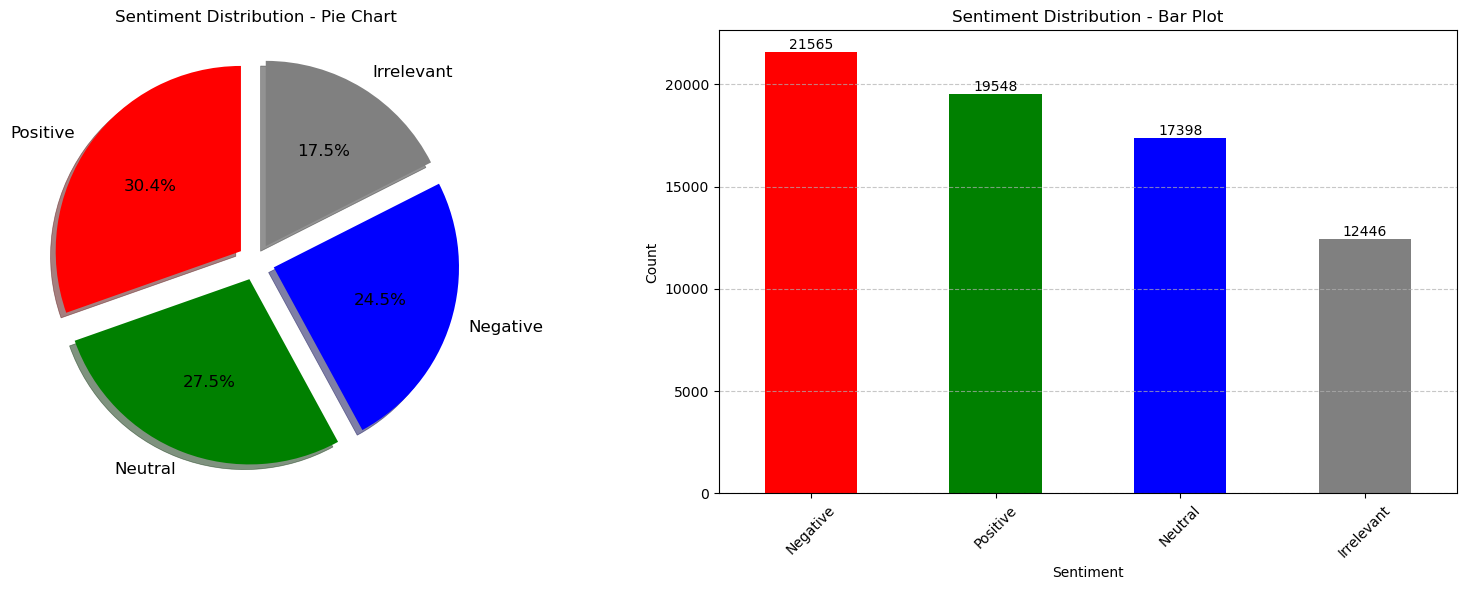

In [46]:
# Define custom colors
colors = ['red', 'green', 'blue', 'gray']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting pie chart for sentiment distribution with custom colors
axs[0].pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].unique(), autopct='%1.1f%%',
            startangle=90, wedgeprops={'linewidth': 0.5}, textprops={'fontsize': 12},
            explode=[0.1, 0.1, 0.1, 0.1], colors=colors, shadow=True)
axs[0].set_title('Sentiment Distribution - Pie Chart')

# Plotting bar plot for sentiment distribution
axs[1] = df['Sentiment'].value_counts().plot(kind='bar', color=colors, ax=axs[1])
axs[1].set_title('Sentiment Distribution - Bar Plot')
axs[1].set_xlabel('Sentiment')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add text on top of each bar in the bar plot
for p in axs[1].patches:
    axs[1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

<a id="2_2"></a>
# <b> <span style='color:dimgray'>Step 2.2</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Cross Table</span></b>


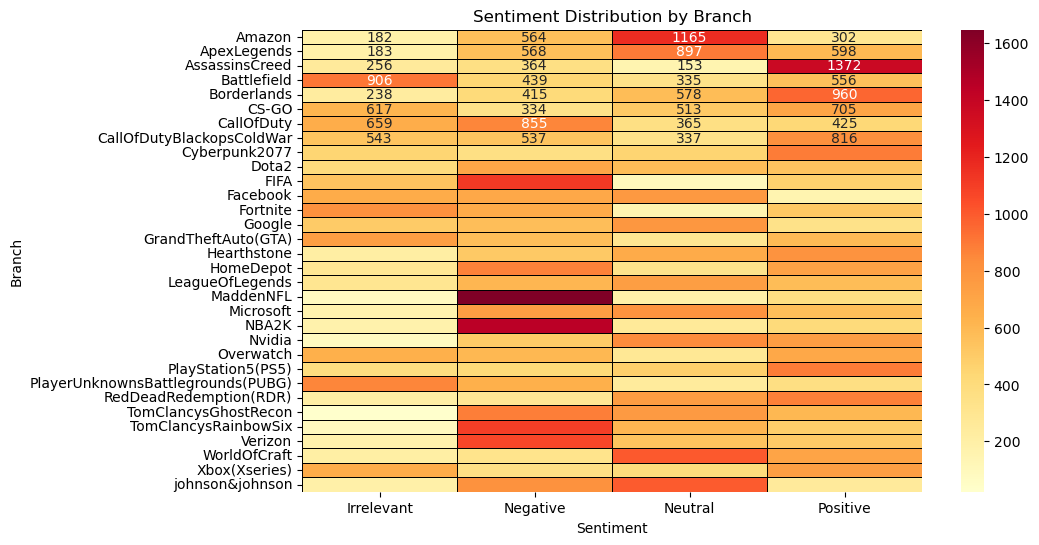

In [47]:
# Create cross-tabulation table in plot
plt.figure(figsize=(10, 6))
count_table = pd.crosstab(index=df['Branch'], columns=df['Sentiment'])
sns.heatmap(count_table, cmap='YlOrRd', annot=True, fmt='d',linewidths=0.5, linecolor='black')
plt.title('Sentiment Distribution by Branch')
plt.xlabel('Sentiment')
plt.ylabel('Branch')
plt.show()

In [48]:
# Display minimum and maximum values for each sentiment for each branch
for sentiment in count_table.columns:
    min_branch = count_table[sentiment].idxmin()
    max_branch = count_table[sentiment].idxmax()
    min_val = count_table[sentiment].min()
    max_val = count_table[sentiment].max()
    print(f"Sentiment '{sentiment}':")
    print(f"  Minimum value '{min_val}' at Branch '{min_branch}'")
    print(f"  Maximum value '{max_val}' at Branch '{max_branch}'\n")


Sentiment 'Irrelevant':
  Minimum value '23' at Branch 'TomClancysGhostRecon'
  Maximum value '906' at Branch 'Battlefield'

Sentiment 'Negative':
  Minimum value '289' at Branch 'RedDeadRedemption(RDR)'
  Maximum value '1647' at Branch 'MaddenNFL'

Sentiment 'Neutral':
  Minimum value '100' at Branch 'FIFA'
  Maximum value '1165' at Branch 'Amazon'

Sentiment 'Positive':
  Minimum value '154' at Branch 'Facebook'
  Maximum value '1372' at Branch 'AssassinsCreed'



> Sentiment : **Positive**\
  Minimum value **154** at Branch **'Facebook'**\
  Maximum value **1372** at Branch **'AssassinsCreed'**
  
 
> Sentiment : **Negative**\
  Minimum value **289** at Branch **'RedDeadRedemption(RDR)'**\
  Maximum value **1647** at Branch **'MaddenNFL'** 
  
> Sentiment : **Neutral**\
  Minimum value **100** at Branch **'FIFA'**\
  Maximum value **1165** at Branch **'Amazon'**
  
> Sentiment : **Irrelevant**\
  Minimum value **2112** at Branch **'PlayerUnknownsBattlegrounds(PUBG)'**\
  Maximum value **2304** at Branch **'CallOfDuty'**



<a id="2_3"></a>
# <b> <span style='color:dimgray'>Step 2.3</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Cloud Plot Of Branch</span></b>


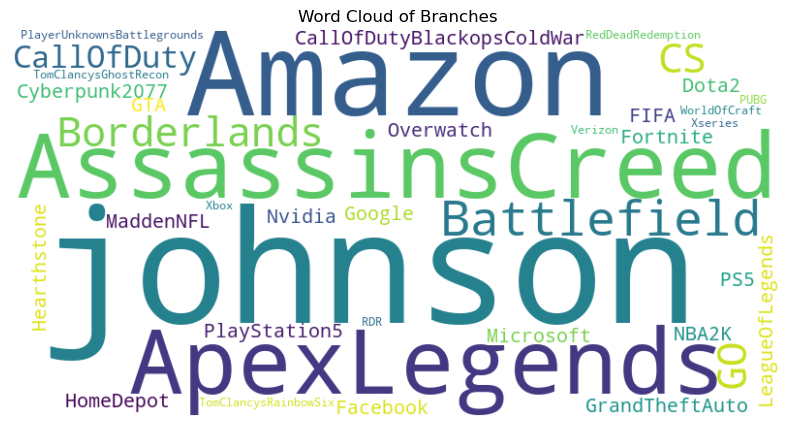

In [49]:
# Convert branches to a single string
branches_text = ' '.join(count_table.index)

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(branches_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Branches')
plt.axis('off')
plt.show()


<a id="2_4"></a>
# <b> <span style='color:dimgray'>Step 2.4</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Cloud Plot Of Tweet</span></b>


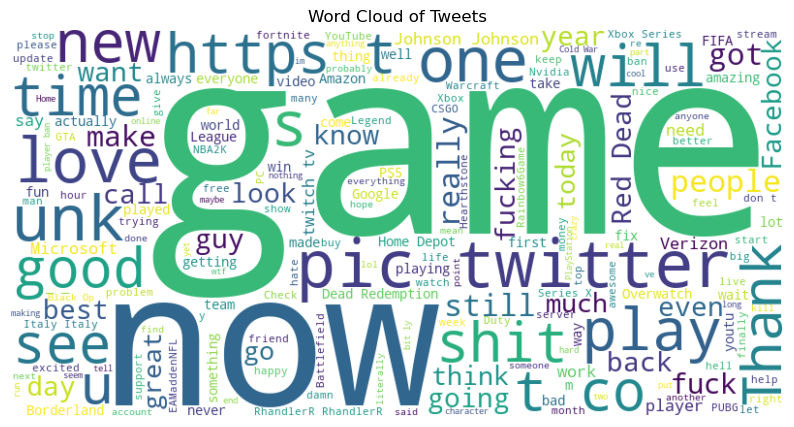

In [50]:
# Concatenate all tweets into a single string
all_tweets_text = ' '.join(df['Tweet'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets')
plt.axis('off')
plt.show()

<a id="3"></a>
# <b> <span style='color:dimgray'>Step 3</span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Preprocessing The Data</span></b>


<a id="3_1"></a>
# <b> <span style='color:dimgray'>Step 3.1 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Remove Non-String</span></b>


**Remove Non-String: In this step, any non-string characters or elements are removed from the text. For example, if your text contains numbers or special characters that are not relevant to the classification task, they can be removed.**

**Example:**\
**Input: "The product is priced at $99."**\
**Output: "The product is priced at ."**

In [51]:
def filter_non_string(df, column):
    """
    Filter out rows with non-string values in the specified column.
    Convert non-string values to strings.
    """
    df = df.dropna(subset=[column])
    df[column] = df[column].astype(str)
    return df


<a id="3_2"></a>
# <b> <span style='color:dimgray'>Step 3.2 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Convert In LowerCase</span></b>


**Convert to Lowercase:** This step involves converting all the text to lowercase. It helps in treating words with different cases as the same and reduces the vocabulary size.

**Example:**  
**Input:** "I LOVE OpenAI."  
**Output:** "i love openai."


In [52]:
def normalize_text(text):
    """Convert text to lowercase to ensure consistency across the corpus."""
    return text.lower()


<a id="3_3"></a>
# <b> <span style='color:dimgray'>Step 3.3 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Remove HTML Tags</span></b>


**Remove HTML Tags:** If your text contains HTML tags, such as <p>, <a href="...">, or <b>, you may want to remove them as they usually don't contribute to the classification task.

**Example:**  
**Input:** "<p>This is an >><b>important>></b> <<>>message.</p>"  
**Output:** "This is an important message."


In [53]:
def remove_html_tags(text):
    """Remove HTML tags from the text."""
    return re.sub(r'<.*?>', '', text)


<a id="3_4"></a>
# <b> <span style='color:dimgray'>Step 3.4 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Remove URL Or HyperLink</span></b>


**Remove URLs:** URLs or website links might not provide any useful information for classification and can be removed.

**Example:**  
**Input:** "Check out this amazing website: www.example.com"  
**Output:** "Check out this amazing website:"


In [54]:
def remove_urls(text):
    """Remove URLs or hyperlinks from the text."""
    return re.sub(r'http\S+|www\S+', '', text)


<a id="3_5"></a>
# <b> <span style='color:dimgray'>Step 3.5 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Remove Numeric Digit</span></b>


**Remove Numeric Digits:** Numeric digits are often irrelevant for text classification tasks and can be removed.

**Example:**  
**Input:** "I have 10 apples."  
**Output:** "I have apples."


In [55]:
def remove_numbers(text):
    """Exclude numerical digits from the text."""
    return re.sub(r'\d+', '', text)


<a id="3_6"></a>
# <b> <span style='color:dimgray'>Step 3.6 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Remove Punctuation</span></b>


**Remove Punctuation:** Punctuation marks such as periods, commas, or exclamation marks can be removed as they usually don't carry important semantic information.

**Example:**  
**Input:** "Hello, how are you?"  
**Output:** "Hello how are you"


In [56]:
def remove_punctuation(text):
    """Remove punctuation marks from the text."""
    return text.translate(str.maketrans('', '', string.punctuation))


<a id="3_7"></a>
# <b> <span style='color:dimgray'>Step 3.7 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Split Text In Token</span></b>


**Split Text into Tokens:** This step involves splitting the text into individual words or tokens. Tokens serve as the basic units for further analysis.

**Example:**  
**Input:** "I love natural language processing."  
**Output:** ["I", "love", "natural", "language", "processing"]


In [57]:
def tokenize_text(text):
    """Split the text into individual words or tokens."""
    return word_tokenize(text)


<a id="3_8"></a>
# <b> <span style='color:dimgray'>Step 3.8 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Eliminate Stopwords</span></b>


**Eliminate Stop Words:** Stop words are commonly used words like "the," "is," or "and" that don't carry much meaning and can be removed to reduce noise in the data.

**Example:**  
**Input:** "The quick brown fox jumps over the lazy dog."  
**Output:** ["quick", "brown", "fox", "jumps", "lazy", "dog"]


In [58]:
def remove_stopwords(tokens):
    """Eliminate common stopwords from the tokenized text."""
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]


<a id="3_9"></a>
# <b> <span style='color:dimgray'>Step 3.9 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Remove Emojis</span></b>


**Remove Emoji:** Emojis are graphical representations that may not contribute much to the classification task and can be removed.

**Example:**  
**Input:** "I'm feeling 😊 today."  
**Output:** "I'm feeling today."


In [59]:
import re

def remove_emojis(text):
    """Remove emojis from the text."""
    if isinstance(text, str):
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # chinese char
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text


<a id="3_10"></a>
# <b> <span style='color:dimgray'>Step 3.10 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Vectorize Data</span></b>


**Vectorized Data:** Text data needs to be converted into numerical vectors for machine learning algorithms to process. Various techniques like Bag-of-Words, TF-IDF, or word embeddings can be used for vectorizing the text.

**Example:**  
**Input:** ["I", "love", "OpenAI"]  
**Output:** [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, ...] (vector representation)


In [60]:
def vectorize_data(text_data):
    # Join the tokenized text into strings
    text_data_strings = [" ".join(tokens) for tokens in text_data]
    # Initialize TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    # Fit and transform the text data to generate TF-IDF vectors
    tfidf_vectors = tfidf_vectorizer.fit_transform(text_data_strings)
    return tfidf_vectors, tfidf_vectorizer


In [61]:

def preprocess_text(df):
    df = filter_non_string(df, 'Tweet')
    df['Tweet'] = df['Tweet'].apply(normalize_text)
    df['Tweet'] = df['Tweet'].apply(remove_html_tags)
    df['Tweet'] = df['Tweet'].apply(remove_urls)
    df['Tweet'] = df['Tweet'].apply(remove_numbers)
    df['Tweet'] = df['Tweet'].apply(remove_punctuation)
    df['Tweet'] = df['Tweet'].apply(tokenize_text)
    df['Tweet'] = df['Tweet'].apply(remove_stopwords)
    df['Tweet'] = df['Tweet'].apply(remove_emojis)
    return df

# Usage:
df_processed = preprocess_text(df)

<a id="4"></a>
# <b> <span style='color:dimgray'>Step 4 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Build Model</span></b>


<a id="4_1"></a>
# <b> <span style='color:dimgray'>Step 4.1 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Train Split Data</span></b>


In [62]:

# df_processed contains preprocessed text data
# Convert list of words into a single string for each entry in 'Tweet' column
df_processed['Tweet'] = df_processed['Tweet'].apply(lambda x: ' '.join(x))

# Split data into features (X) and target (y)
X = df_processed['Tweet']  # Features
y = df_processed['Sentiment']  # Target

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (56765,)
Shape of X_test: (14192,)
Shape of y_train: (56765,)
Shape of y_test: (14192,)


<a id="4_2"></a>
# <b> <span style='color:dimgray'>Step 4.2 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>RandomForestClassifier</span></b>


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)  # Utilize all available CPU cores for training
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


<a id="4_3"></a>
# <b> <span style='color:dimgray'>Step 4.3 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Confusion Matrix</span></b>


In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a classification report
class_report = classification_report(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("Classification Report:")
print(class_report)


<a id="4_4"></a>
# <b> <span style='color:dimgray'>Step 4.4 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Actual VS Predicted</span></b>


In [70]:

# Print some actual vs predicted labels along with tweet text
print("Actual vs Predicted Labels with Tweet Text:")
for tweet, actual_label, predicted_label in zip(X_test[:10], y_test[:10], y_pred[:10]):
    print("Tweet:", tweet)
    print("Actual Label:", actual_label)
    print("Predicted Label:", predicted_label)
    print("-----------------------")


Actual vs Predicted Labels with Tweet Text:
Tweet: women please work stores like circuit home hardware get bored condescending men thinking ’ know another screw
Actual Label: Positive
Predicted Label: Negative
-----------------------
Tweet: zai absolute beast reddit fe
Actual Label: Neutral
Predicted Label: Neutral
-----------------------
Tweet: hard fought indeed …
Actual Label: Neutral
Predicted Label: Neutral
-----------------------
Tweet: rhandlerr ’ superstar solo wins criminal deserved pictwittercomhilloxffi
Actual Label: Irrelevant
Predicted Label: Irrelevant
-----------------------
Tweet: ea eamaddennfl recent announcement ea locked another long term contract nfl remarkably disrespectful fans madden years allow competition madden longer quality
Actual Label: Negative
Predicted Label: Negative
-----------------------
Tweet: first played apex got wave happiness brings back
Actual Label: Positive
Predicted Label: Positive
-----------------------
Tweet: speed better ever however de

<a id="4_5"></a>
# <b> <span style='color:dimgray'>Step 4.5 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Save Model</span></b>


In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_classifier, 'rf_model.pkl')

<a id="4_6"></a>
# <b> <span style='color:dimgray'>Step 4.6 </span> <span style='color:crimson'>|</span> <span style='color:#53599A'>Predict Random Tweet By Model</span></b>


In [71]:

# Load the saved model
Tweet_Sentiment_Ai = joblib.load('rf_model.pkl')

# Define a mapping between sentiment labels and emojis
sentiment_emojis = {
    'Positive': '😄',
    'Negative': '😞',
    'Neutral': '😐',
    'Irrelevant': '🤷‍♂️'
}


tweets = [
    "I am coming to the borders and I will kill you",
    "I'm really disappointed with the latest Borderlands update. It ruined the game for me.",
    "Haven't played Borderlands in a while. Need to catch up on the latest updates.",
    "Just saw a funny cat video while searching for Borderlands gameplay. Cats always cheer me up!"
]


# Transform example tweets into TF-IDF features
tweets_tfidf = vectorizer.transform(tweets)

# Predict sentiment for example tweets
predictions = Tweet_Sentiment_Ai.predict(tweets_tfidf)

# Print the predicted sentiment and corresponding emoji for each example tweet
for tweet, prediction in zip(tweets, predictions):
    sentiment = prediction
    emoji = sentiment_emojis[sentiment]  # Get the emoji directly from the mapping without a default value
    print("Tweet:", tweet)
    print("Sentiment:", sentiment)
    print("Emoji:", emoji)
    print()

Tweet: I am coming to the borders and I will kill you
Sentiment: Positive
Emoji: 😄

Tweet: I'm really disappointed with the latest Borderlands update. It ruined the game for me.
Sentiment: Negative
Emoji: 😞

Tweet: Haven't played Borderlands in a while. Need to catch up on the latest updates.
Sentiment: Neutral
Emoji: 😐

Tweet: Just saw a funny cat video while searching for Borderlands gameplay. Cats always cheer me up!
Sentiment: Neutral
Emoji: 😐



<img src="https://i.gifer.com/7ARb.gif" style="width:100%">

# **THANK YOU !**